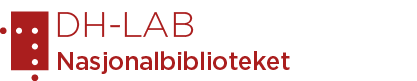

## 1. Frekvenslister
Frekvenslister fra tekster kan danne utgangspunkt for mye informasjon om teksten.

Her bruker vi klassen `Counts` for å hente frekvensklister (absoluttfrekvenser) fra boka.

`urn`er identifikator for boka i Nasjonalbibliotekets samling. Under eksempelfila om korpusbygging() finnes mer informasjon om hvordan man bygger et korpus. Urn finner man i bokas metadata, og de er på denne formen: https://urn.nb.no/URN:NBN:no-nb_digibok_2012051608012. Det er de 13 sifrene på slutten vi bruker her.

In [57]:
from dhlab import Counts, totals, Corpus
import dhlab.graph_networkx_louvain as gnl
import pandas as pd
import dhlab.nbtext as nb

### 1.1 Frekvensliste for enkeltbøker

#### 1.1.1 Kort sakprosabok

In [10]:
urn = "URN:NBN:no-nb_digibok_2021011848587"
bok = Counts([urn])

# Fra frekvenslista kan vi se at:
    # "i" har høyere frekvens enn "," - da kan vi anta at det er en sakprosatekst
    # "vann" er det sjette mest frekvente ordet, altså handler teksten om vann
    # 348 punktum, dette er en kort tekst. (Punktum ligger rundt 5% av teksters lengde)

In [18]:
bok.frame.iloc[:, 0]

,                184
.                162
og                94
i                 93
det               51
                ... 
avbetaling         1
atenerinnene       1
1942               1
april              1
filmversjonen      1
Name: 100431574, Length: 1597, dtype: int64

Vi kan sammenlikne frekvenslista for boka med et større korpus, som vi her legger i variabelen tot

In [13]:
tot = totals()

Vi lager en dataramme, `nb.frame()` for forholdet mellom frekvensene for ordene i vann og for de 50000 mest frekvente ordene i hele nb.no

In [21]:
(bok.frame.iloc[:, 0] / tot.iloc[:, 0]).sort_values(ascending=False).head(20)

Hedda          0.000050
def            0.000030
Ivo            0.000026
Skjønberg      0.000023
Claes          0.000019
Gill           0.000017
oppførelse     0.000016
teatrene       0.000016
VAN            0.000015
væsen          0.000013
Alten          0.000013
Rosenkrantz    0.000011
Kaas           0.000011
poetiske       0.000010
ensemblet      0.000010
Høst           0.000010
Jæger          0.000010
kontra         0.000009
Peggy          0.000009
Vauxhall       0.000009
dtype: float64

In [35]:
tot

freq
.             7655423257
,             5052171514
i             2531262027
og            2520268056
-             1314451583
...                  ...
tidspunkter       110667
dirigenter        110660
ondartet          110652
kulturtilbud      110652
trassig           110651

[50000 rows x 1 columns]

#### 1.1.2. Knausgårds *Min kamp / Første bok*

In [28]:
min_kamp_1 = Counts(["URN:NBN:no-nb_digibok_2014032405041"])
min_kamp_1.head(20)

100197175
,          14332
.           9480
og          5383
det         4430
jeg         4175
i           3657
var         3238
på          3152
-           2500
som         2463
en          2175
hadde       2010
ikke        1947
av          1900
den         1895
til         1815
med         1787
sa          1705
meg         1581
å           1575

In [40]:
(min_kamp_1.frame.iloc[:, 0] / tot.iloc[:,0]).sort_values(ascending=False).head(20).to_frame("ratio")

ratio
Yngve       0.000572
Farmor      0.000376
pappas      0.000231
farmor      0.000203
Ylva        0.000190
skrudde     0.000154
Jada        0.000130
Fløgstad    0.000119
helte       0.000114
koppen      0.000108
kroppene    0.000108
gitaren     0.000105
jævla       0.000105
rekkverket  0.000104
cola        0.000103
røykte      0.000101
sigaretten  0.000101
kløv        0.000097
faen        0.000094
stuen       0.000090

### 1.2. Sammenlikning av frekvens for ulike bøker

In [56]:
# Frekvenslisiter for 20 Anne-Cath. Vestly bøker
vestly = Counts(
    Corpus(
        author="Anne*Vestly*",
        limit=20
    )
)
vestly.head()

100464830  100478659  100002573  100522279  100151409  100155158  \
,     1926.0     3157.0     1830.0      562.0     2596.0     2724.0   
.     1636.0     3058.0     1620.0      737.0     2167.0     1954.0   
«     1014.0      812.0      948.0      151.0     1288.0     1407.0   
»     1005.0      807.0      908.0      132.0     1285.0     1409.0   
6      917.0        3.0      465.0        2.0        2.0        0.0   

   100502239  100516272  100541414  100575251  100130635  100164506  \
,     1954.0     3216.0     2492.0     4852.0     1992.0     1330.0   
.     1955.0     2963.0     1681.0     3587.0     1722.0     1932.0   
«     1037.0     1551.0     1093.0     2152.0      909.0      227.0   
»     1040.0     1556.0     1095.0     2152.0      912.0      228.0   
6        1.0        3.0        0.0        1.0        0.0        1.0   

   100174635  100495413  100223880  100323467  100427375  100428375  \
,     2612.0      707.0     1397.0      431.0        5.0     2976.0   
.     1949.0      733.0     2279.0      430.0       13.0     1960.0   
«     1294.0        0.0      529.0      241.0        0.0     1325.0   
»     1301.0        0.0      527.0      242.0        0.0     1327.0   
6        0.0        1.0        1.0        1.0        0.0        1.0   

   100428431  100602349  
,     2953.0     2265.0  
.     1858.0     1704.0  
«     1369.0     1011.0  
»     1363.0     1008.0  
6        1.0        0.0

In [59]:
# Vi kan legge på et varmekart for lettere å få oversikt

nb.heatmap(vestly.frame.head(20))

### 1.3. Frekvens for spesifikke termer

In [60]:
def heatmap_loc(dr, ordliste, sorter=0):
    df = dr.loc[ordliste]
    return nb.heatmap(df.sort_values(by=df.columns[sorter], ascending=False))

In [67]:
# Her lager vi en funksjon heatmap_loc som vi bruker for å plukke ut enkelte ord fra korpuset som vi vil sammenlikne.


heatmap_loc(vestly.frame, "Mormor Morten Marte Ole Aleksander Guro Lillebror Knerten".split())


In [61]:
# Er forfatteren konsekvent når det kommer til ordformer?

heatmap_loc(vestly.frame, "boken boka sola solen".split())

## 2. Sttr

Standardized text token ratio er et mål på ordvariasjon i en tekst.
    

In [62]:
# Knausgårds bok Min kamp har en ganske vanlig verdi for romaner for voksne

min_kamp_sttr = nb.sttr(2014032405041)
min_kamp_sttr

0.2846430162281015

In [63]:
# Den korte sakprosaboka om vann får en uvanlig høy verdi fordi teksten er så kort. 

bok_sttr = nb.sttr(2012051608012)
bok_sttr

0.5063009811239552

In [65]:
# Rune Slagstads 'De nasjonale strateger' har en høy verdi til å være en bok på over 600 sider

nasjonale_strateger_sttr = nb.sttr(2011041306001)
nasjonale_strateger_sttr

0.3967847453469051

### 2.1. STTR på et korpus

In [64]:
urns = nb.book_urn(author='Vestly%Anne%', limit=20)

res =[]

for x in urns: 
    res.append([nb.sttr(x[0])]+x)
    
nb.frame(res, 'sttr urn forfatter tittel år'.split())

sttr            urn           forfatter  \
0   0.202526  2008103104089  Vestly, Anne-Cath.   
1   0.204593  2009041400055  Vestly, Anne-Cath.   
2   0.220606  2008071604033  Vestly, Anne-Cath.   
3   0.223786  2014011008038  Vestly, Anne-Cath.   
4   0.210977  2011060906088  Vestly, Anne-Cath.   
5   0.228886  2011111508083  Vestly, Anne-Cath.   
6   0.326904  2014020628003  Vestly, Anne-Cath.   
7   0.266441  2009012004037  Vestly, Anne-Cath.   
8   0.288113  2014091908012  Vestly, Anne-Cath.   
9   0.225427  2008100204035  Vestly, Anne-Cath.   
10  0.201325  2009050704102  Vestly, Anne-Cath.   
11  0.230010  2008091604020  Vestly, Anne-Cath.   
12  0.221202  2007070500007  Vestly, Anne-Cath.   
13  0.296206  2007061200012  Vestly, Anne-Cath.   
14  0.219205  2012091705071  Vestly, Anne-Cath.   
15  0.217098  2011112808030  Vestly, Anne-Cath.   
16  0.231583  2013010308186  Vestly, Anne-Cath.   
17  0.225349  2007072604056  Vestly, Anne-Cath.   
18  0.238227  2010070605105  Vestly, Anne-Cath.   
19  0.256606  2011032208068  Vestly, Anne-Cath.   

                                             tittel    år  
0                                Knerten politimann  2001  
1                              Lillebror og Knerten  1998  
2                     Aurora og den vesle blå bilen  1997  
3                    Ole Aleksander Filibom-bom-bom  1985  
4                          Mormor og de åtte ungene  2003  
5                          Ole Aleksander på sirkus  1971  
6                                    Hvor er Kvikko  1996  
7                           Nesten et helt menneske  2000  
8                            Ole Aleksander flytter  2002  
9                    Ole Aleksander Filibom-bom-bom  1999  
10                     Knerten og forundringspakken  1999  
11  Mormor og de åtte ungene på sykkeltur i Danmark  1998  
12                      Guro og Frydefoniorkesteret  1981  
13                      Ole Aleksander på flyttefot  1958  
14                            Kaos og hemmeligheten  1987  
15                         Ole Aleksander på farten  1956  
16              Ole Aleksander og den slemme gutten  1993  
17                                 Aurora i Holland  1970  
18              Marte og mormor og mormor og Morten  1959  
19                  Anne-Cath. Vestly for de voksne  2003